In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/superstore.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-16,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
data.shape

(9994, 21)

In [5]:
# Check missing values
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

“The dataset had no missing values, so no imputation was required. This reduced the risk of bias in analysis.”

In [6]:
#checking duplicates
data.duplicated().sum()

np.int64(0)

“The dataset has no duplicate rows, so no deduplication was required.”

In [7]:
# convert 'Order Date' and 'Ship Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

C:\Users\ratho\AppData\Local\Temp\ipykernel_7868\3383228859.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'])
C:\Users\ratho\AppData\Local\Temp\ipykernel_7868\3383228859.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Ship Date'] = pd.to_datetime(data['Ship Date'])


“Order Year and Month help analyze sales and profit trends over time, identify seasonality, and compare business performance across different periods.”

In [8]:
# verify the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
# converting order date to year, month, month name
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Month Name'] = data['Order Date'].dt.month_name()

In [10]:
# profit Margin
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
data['Profit Margin'] = data['Profit Margin'].round(2)

In [11]:
data[["Sales", "Profit", "Profit Margin"]].head()

,Sales,Profit,Profit Margin
0,261.9600,41.9136,16.00
1,731.9400,219.5820,30.00
2,14.6200,6.8714,47.00
3,957.5775,-383.0310,-40.00
4,22.3680,2.5164,11.25


In [12]:
# KPI Calculations
total_sales = data['Sales'].sum()
total_profit = data['Profit'].sum()
average_profit_margin = data['Profit Margin'].mean()

total_sales, total_profit, average_profit_margin

(np.float64(2297200.8603000003),
 np.float64(286397.0217),
 np.float64(12.031389833900342))

“Sales shows how much the business is selling, but profit margin shows how much the business is actually keeping as profit. A company can have high sales but low profit if costs are high.”

Example:

Company A: High sales, low profit margin → risky business

Company B: Moderate sales, high profit margin → healthier business

Profit margin helps measure business efficiency and profitability, which sales alone cannot reveal.

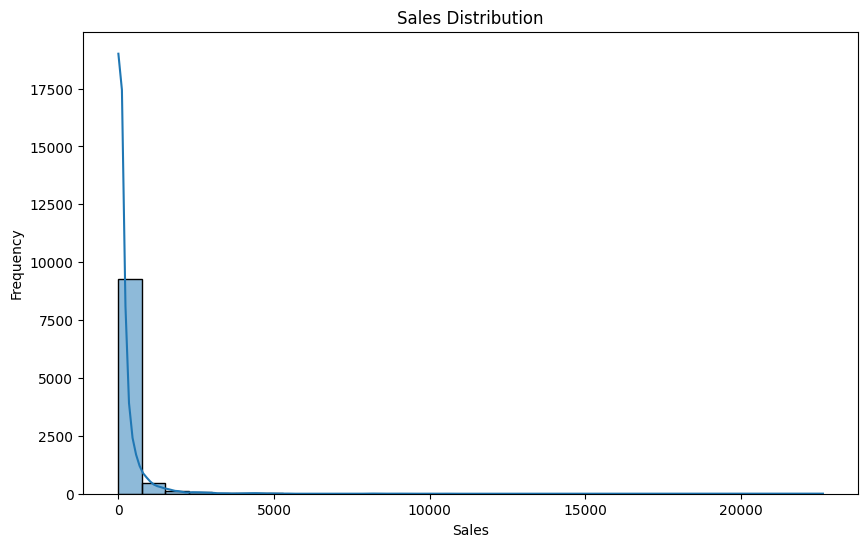

In [13]:
# Sales Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Sales Distribution Insight:
The sales data is right-skewed, indicating that most orders have low to moderate sales values, while a small number of orders contribute very high sales, acting as outliers. This suggests that a limited set of large transactions may be driving a significant portion of total revenue.

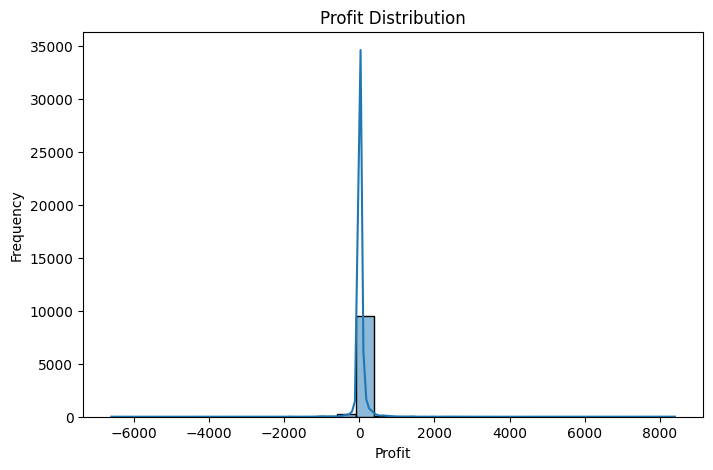

In [14]:
# profit Distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Profit'], bins=30, kde=True)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency') 
plt.show()

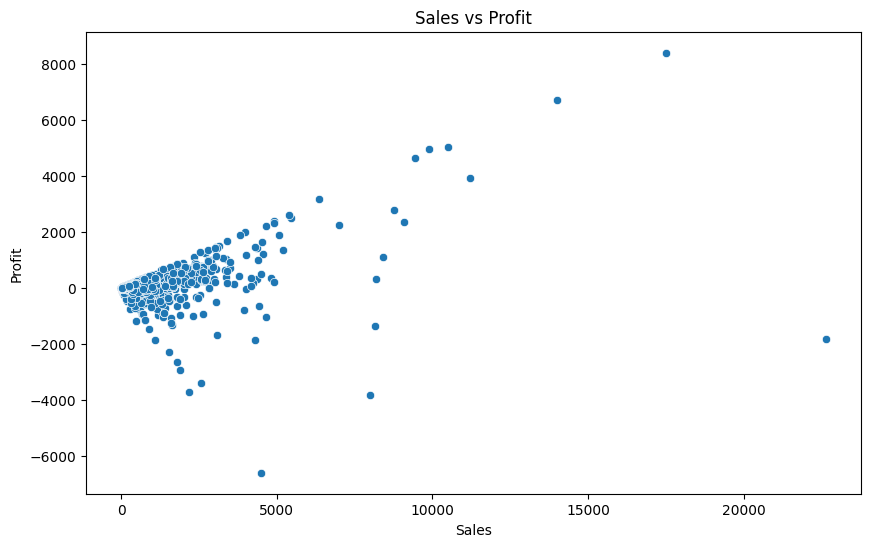

In [15]:
# Sales vs Profit Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', data=data)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

Sales vs Profit Insight:

Although sales and profit show a positive relationship, the scatter plot reveals several cases where high sales result in low or negative profit. 

This indicates that some high-value orders are unprofitable, likely due to excessive discounts or high operational costs. Therefore, increasing sales alone does not guarantee higher profitability.

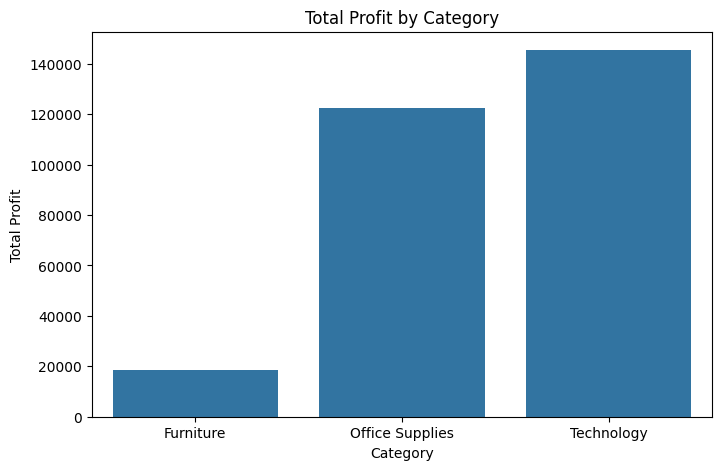

In [16]:
# Category-wise Profit Analysis
category_profit = data.groupby('Category')['Profit'].sum().reset_index()
category_profit
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit', data=category_profit)
plt.title('Total Profit by Category')
plt.xlabel('Category')  
plt.ylabel('Total Profit')
plt.show()

Category Profit Insight:

The Technology category generates the highest profit (140k+), making it the most profitable segment of the business. In contrast, 
the Furniture category shows significantly lower profit (~20k), indicating weaker margins and potential cost or pricing issues despite sales activity.
The company should review pricing, discount policies, and logistics costs in the Furniture category, while continuing to invest in the high-performing Technology segment.

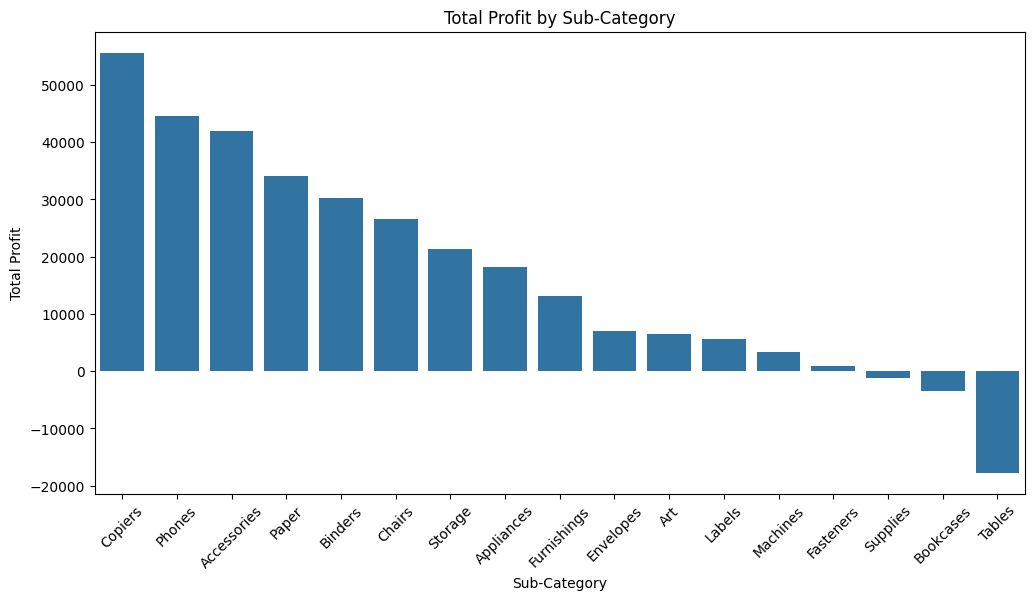

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


In [17]:
# Gropyby Sub-Category Profit Analysis
sub_category_profit = data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Sub-Category', y='Profit', data=sub_category_profit)
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()
sub_category_profit

Sub-Category Profit Analysis:

Three sub-categories are consistently loss-making: Tables (-17.7k), Bookcases (-3.4k), and Supplies (-1.2k). 
Among these, Tables contribute the largest losses, which strongly explains the low profitability of the overall Furniture category.

“Although overall sales are strong, certain furniture sub-categories like Tables and Bookcases are sold at a loss, which reduces total profitability. Focusing on margin optimization rather than sales volume alone can significantly improve business performance.”

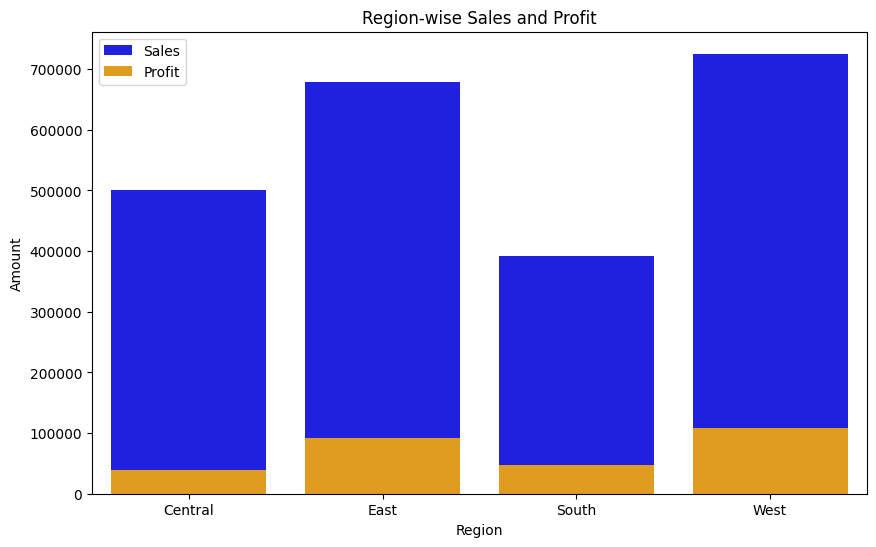

,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


In [18]:
# Region-wise Performance Analysis
region_performance = data.groupby('Region').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
plt.figure(figsize=(10,6))      
sns.barplot(x='Region', y='Sales', data=region_performance, color='blue', label='Sales')
sns.barplot(x='Region', y='Profit', data=region_performance, color='orange', label='Profit')
plt.title('Region-wise Sales and Profit')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend()    
plt.show()
region_performance

Regional Performance Insight:
The West region is the top-performing region, generating both the highest sales and the highest profit, indicating strong market demand and effective cost management. In contrast, the Central region shows comparatively low profitability, suggesting potential issues related to pricing, discounts, or operational costs.

“While the West region performs strongly, profitability issues are mainly driven by specific product sub-categories and weaker regional performance, particularly in the Central region. Addressing pricing and cost inefficiencies there can significantly improve overall profitability.”

In [23]:
# Monthly Sales and Profit Trend
monthly_summary = (
    data.groupby(['Order Year', 'Order Month'])
      [['Sales', 'Profit']]
      .sum()
      .reset_index()
      .sort_values(['Order Year', 'Order Month'])
)

monthly_summary.head()


,Order Year,Order Month,Sales,Profit
0,2014,1,28953.706,4549.4546
1,2014,2,12743.108,2654.5569
2,2014,3,54801.906,92.6990
3,2014,4,24710.016,4601.0714
4,2014,5,29639.834,3912.2499


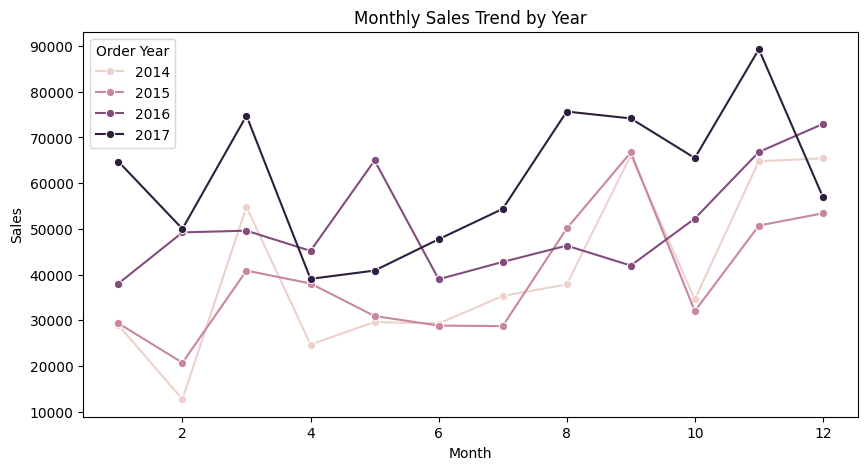

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Order Month', y='Sales', hue='Order Year', data=monthly_summary, marker='o')
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

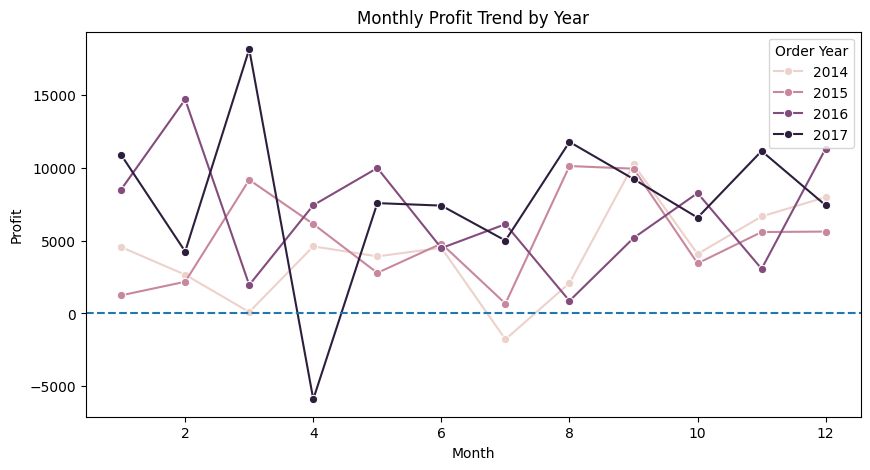

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Order Month', y='Profit', hue='Order Year', data=monthly_summary, marker='o')
plt.title('Monthly Profit Trend by Year')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.axhline(0, linestyle='--')
plt.show()
